# 문제풀이 Overview
* 이번 문제풀이에서는 총 5개의 문제와 1개의 자유주제를 다룹니다.
* 문제를 본격적으로 풀기 전에 아래 코드를 실행해 `pandas` 라이브러리를 임포트하고 데이터를 읽어와주세요.

In [ ]:
import pandas as pd            # pandas: 데이터 분석 라이브러리
import matplotlib as plt       # matplotlib: 데이터 시각화 라이브러리.
import seaborn as sns          # seaborn: 데이터 시각화 라이브. 통계 그래픽을 더 쉽게.
import statsmodels.api as sm   # statsmodels: 파이썬의 통계 모델링과 검증을 수행하는 라이브러리

In [ ]:
tips = pd.read_csv('https://raw.githubusercontent.com/datarian-kr/pandas/main/data/tips.csv')

# 데이터 설명
이 데이터는 웨이터가 자신이 받은 팁과, 팁을 받았을 때의 영수금액, 계산한 사람의 정보 등을 기록한 것입니다. 이번 섹션에서 배운 `pivot`, `pivot_table` 함수를 이용하여 **어떤 경우 팁을 많이 받을 수 있는지** 분석해봅시다.

💡 `pivot`, `pivot_table` 사용이 아직 익숙하지 않은 분들은 구글 스프레드 시트나, `groupby` 함수를 사용하여 분석해도 좋습니다. '모로 가도 서울만 가면 된다'라는 말도 있잖아요!

**컬럼 상세**

- total_bill: 영수 금액 (달러) *팁을 포함하지 않음*
- tip: 팁 (달러)
- sex: 계산한 사람의 성별
- smoker: 일행 중에 흡연자가 있었는지 여부
- day: 요일
- time: 점심 또는 저녁
- size: 일행의 인원 (명)

**References**
- Bryant, P. G. and Smith, M (1995) Practical Data Analysis: Case Studies in Business Statistics. Homewood, IL: Richard D. Irwin Publishing

# 데이터 미리보기

In [ ]:
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


# Q1. 탐색적 데이터 분석
[탐색적 데이터 분석(EDA, Exploratory Data Analysis)](https://en.wikipedia.org/wiki/Exploratory_data_analysis)이란 본격적인 데이터 분석을 시작하기 전에, 그래프나 기초 통계를 이용하여 주어진 자료를 파악하는 과정입니다.

`describe()`, `unique()` 등 지금까지 배운 함수를 이용하여 데이터를 자유롭게 탐색해봅시다.

**아래의 간단한 질문들에 답하며 EDA를 시작해 볼까요?**

<br><br> 🇶 총 몇 개의 팁 데이터가 들어있나요?
<br> 🇦 244개
<br><br> 🇶 팁은 평균적으로 얼마를 받았나요?
<br> 🇦 약 3달러
<br><br> 🇶 누락된 데이가 있나요?
<br> 🇦 없음
<br><br> 🇶 `sex`, `smoker`, `day`, `time` 데이터에는 각각 어떤 데이터들이 들어있나요?
<br> 🇦 sex: ['Female' 'Male']
<br> 🇦 smoker: ['No' 'Yes']
<br> 🇦 day: ['Sun' 'Sat' 'Thur' 'Fri']
<br> 🇦 time: ['Dinner' 'Lunch']

In [ ]:
# 팁 데이터 확인
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [ ]:
# 각 열의 데이터 타입 및 결측치 확인
print(tips.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None


In [ ]:
# 컬럼 별로 어떤 값들이 들어가는지 확인
print(tips['sex'].unique())
print(tips['smoker'].unique())
print(tips['day'].unique())
print(tips['time'].unique())

['Female' 'Male']
['No' 'Yes']
['Sun' 'Sat' 'Thur' 'Fri']
['Dinner' 'Lunch']


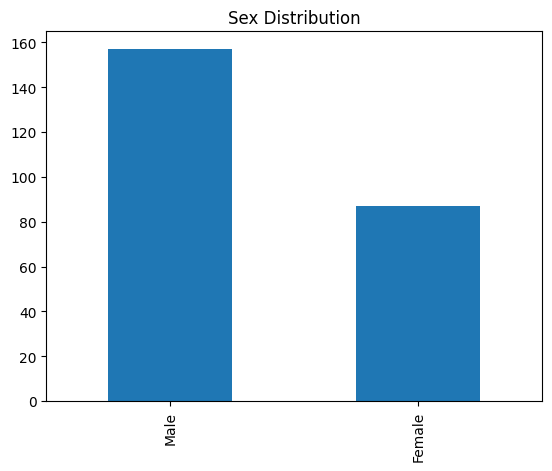

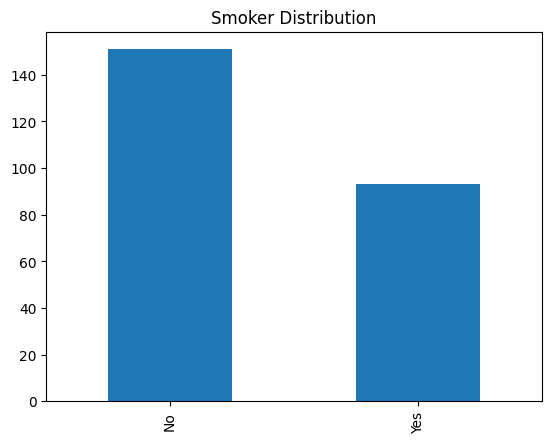

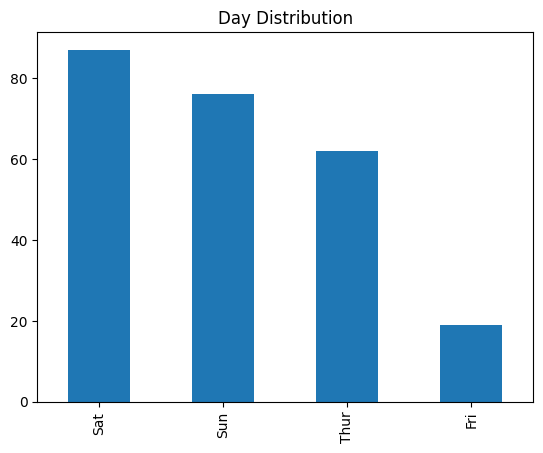

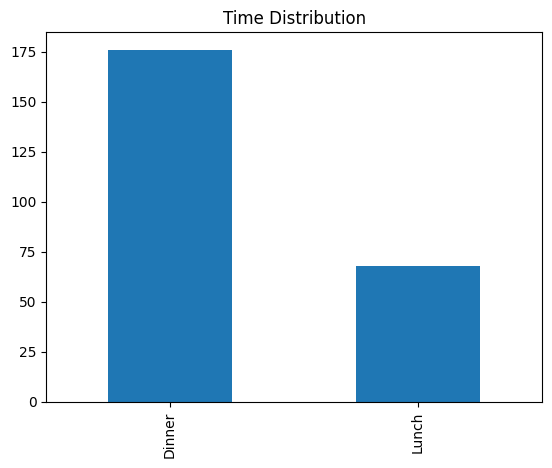

In [ ]:
# 범주형 변수의 분포 확인
import matplotlib.pyplot as plt

tips['sex'].value_counts().plot(kind='bar', title='Sex Distribution')
plt.show()

tips['smoker'].value_counts().plot(kind='bar', title='Smoker Distribution')
plt.show()

tips['day'].value_counts().plot(kind='bar', title='Day Distribution')
plt.show()

tips['time'].value_counts().plot(kind='bar', title='Time Distribution')
plt.show()

# Q2. 팁의 비율
<br><br> 🇶 평균적으로 총 영수 금액의 몇 퍼센트를 팁으로 받고 있나요?
<br> 🇦 팁은 평균적으로 영수 금액의 16% 입니다.  
<br>
아래 단계에 따라 더미로 주어진 코드들을 수정하면서 진행해주세요.

* Step 1. 영수 금액 대비 팁의 비율(%)을 `tip_pct` 라는 새로운 컬럼에 저장
* Step 2. `tip_pct`의 평균을 계산하여 정수로 반올림  
* Step 3. 2번의 결과를 `tip_pct_avg` 라는 변수에 저장

Tip.
* [파이썬의 반올림 내장 함수](https://docs.python.org/3/library/functions.html#round)

In [ ]:
# Answer
tips['tip_pct'] = (tips['tip'] / tips['total_bill']) * 100.0
tips['tip_pct']

0       5.944673
1      16.054159
2      16.658734
3      13.978041
4      14.680765
         ...    
239    20.392697
240     7.358352
241     8.822232
242     9.820426
243    15.974441
Name: tip_pct, Length: 244, dtype: float64

In [ ]:
tip_pct_avg = round(tips['tip_pct'].mean())
tip_pct_avg

16

In [ ]:
print(f"팁은 평균적으로 영수 금액의 {tip_pct_avg}% 입니다.")

NameError: ignored

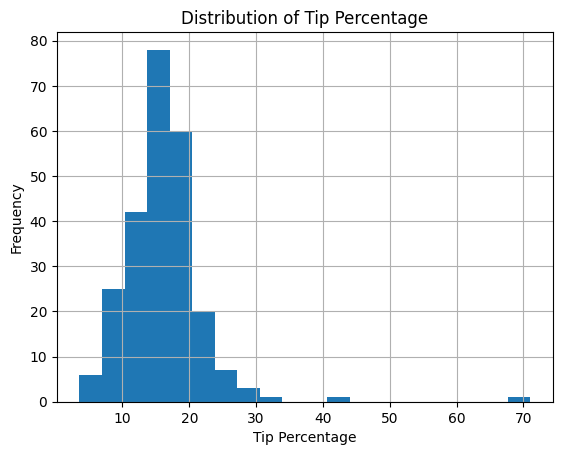

In [ ]:
# 팁의 비율 분포 확인
# import matplotlib as plt
tips['tip_pct'].hist(bins=20)
plt.xlabel('Tip Percentage')
plt.ylabel('Frequency')
plt.title('Distribution of Tip Percentage')
plt.show()

# Q3. 영수 금액과 팁의 관계
영수 금액이 많을수록 팁을 많이 줄까요? x 축을 `total_bill`, y 축을 `tip`으로 하는 산포도를 그려서 확인해봅시다.  

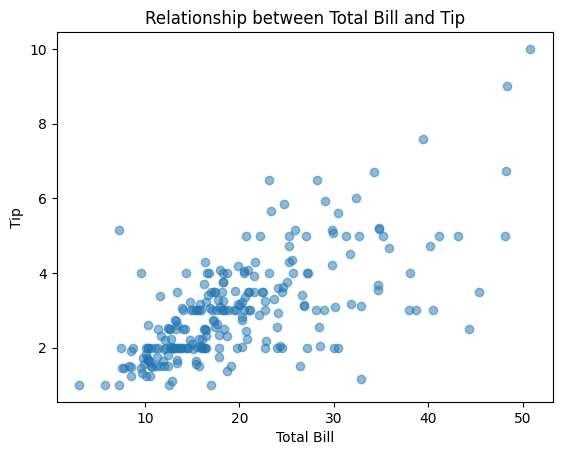

In [ ]:
# Answer
# 영수 금액과 팁의 관계 시각화

# tips.plot.scatter(x='total_bill', y='tip', alpha=0.5)  # 방법1: pandas 시각화

# import matplotlib.pyplot as plt                        # 방법2: Matplotlib의 pyplot 모듈
plt.scatter(tips['total_bill'], tips['tip'], alpha=0.5)
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Relationship between Total Bill and Tip')
plt.show()

### 질문
* 🇶 영수 금액이 많을수록 팁을 많이 주나요?  
* 🇦 대체로 영수 금액에 비례해 팁도 증가하는 것처럼 보이지만, 영수 금액이 많았는데도 적은 팁을 준 경우도 있었음

# Q4. 웨이터 A에게 출근일과 시간대 추천하기

웨이터 A는 일주일에 딱 한 타임(ex. 금요일 저녁 시간대)만 일 할 수 있습니다. 그리고 이왕에 하는 일이라면 팁을 많이 받을 수 있는 날에 출근하고 싶습니다.  

`pivot_table` 함수를 이용하여 팁을 최대로 받을 수 있는 출근일, 시간대를 계산해보고 웨이터 A에게 알려줍시다.  

In [ ]:
# Answer
# 방법1
tips.pivot_table(index='day', columns='time', values='tip', aggfunc='sum')

time,Dinner,Lunch
day,,
Fri,35.28,16.68
Sat,260.40,NaN
Sun,247.39,NaN
Thur,3.00,168.83


### 웨이터 A의 질문
* 웨이터 A: 일주일에 딱 한 타임만 출근할 수 있습니다. 어떤 요일과 시간대에 출근해야 팁을 많이 받을 수 있을까요? 얼마나 받을 수 있나요?   
* 답변: 토요일 저녁 타임에 출근하시면 되고, 예상 팁은 약 260 달러입니다.

In [ ]:
# 방법2
# waiter_A = tips[tips['waiter'] == 'A']                       #실제로 웨이터 ID가 있을 경우
best_day = tips.groupby('day')['tip'].sum().idxmax()
best_time = tips.groupby('time')['tip'].sum().idxmax()
print(f'웨이터 A는 {best_day} {best_time}에 일해야한다.')

웨이터 A는 Sat Dinner에 일해야한다.


# Q5. 웨이터 B에게 출근일 추천하기

웨이터 B는 일주일에 딱 하루만 일 할 수 있습니다. 웨이터 B는 효율을 중시하는 사람입니다. 딱 한 팀만 받아도 괜찮으니 손님 1명 당 팁을 많이 받을 수 있는 날에 일하고 싶습니다.

`pivot_table` 함수 또는 `groupby` 를 이용하여 손님 1명 당 팁을 많이 받을 수 있는 날을 구해주세요.

In [ ]:
# Answer
# 방법1: groupby 사용
tips_daily = tips.groupby('day')[['tip', 'size']].sum()
tips_daily['tip_by_person'] = tips_daily['tip'] / tips_daily['size']
tips_daily

,tip,size,tip_by_person
day,,,
Fri,51.96,40,1.299000
Sat,260.40,219,1.189041
Sun,247.39,216,1.145324
Thur,171.83,152,1.130461


In [ ]:
# Answer
# 방법:2 pivot_table 사용
tips_daily = tips.pivot_table(index='day', values=['tip', 'size'], aggfunc='sum')
tips_daily['tip_by_person'] = tips_daily['tip'] / tips_daily['size']
tips_daily

,size,tip,tip_by_person
day,,,
Fri,40,51.96,1.299000
Sat,219,260.40,1.189041
Sun,216,247.39,1.145324
Thur,152,171.83,1.130461


* 웨이터 B: 일주일에 하루만 출근할 수 있습니다. 어떤 요일에 출근해야 제공한 서비스 대비 팁을 많이 받을 수 있을까요? 손님 한 명 당 팁을 많이 받을 수 있는 날을 추천해주세요.  
* 답변: 손님 한 명 당 팁을 가장 많이 받을 수 있는 날은 금요일으로 손님 당 1.299 달러를 받습니다.

In [ ]:
# 웨이터 B를 위한 분석 수행
# 웨이터 B의 팁을 가장 많이 받는 요일 추천
# waiter_B = tips[tips['waiter'] == 'B']                      #실제로 웨이터 ID가 있을 경우
best_day_B = tips.groupby('day')['tip'].sum().idxmax()
print(f'웨이터 B는 {best_day_B}에 출근해야한다.')

웨이터 B는 Sat에 출근해야한다.


# Q6. 추가분석




### Step 1. 요일 및 시간대에 따른 주문 패턴 분석

<br><br>
🇶 요일별 매출 순위가 어떻게 되나요?
<br>
🇦 '금 <= 목 < 토 < 일'
<br>
🇦 그러나 (오차막대를 보면) '금요일'의 경우 오차의 변동성을 고려할때 목요일의 매출보다 클 수가 있다.
<br>
<br>
🇶 시간대별 주문수는 얼마나 차이가 나지?
<br>
🇦 저녁과 점심의 주문수가 대략 100건 정도 차이를 보인다.

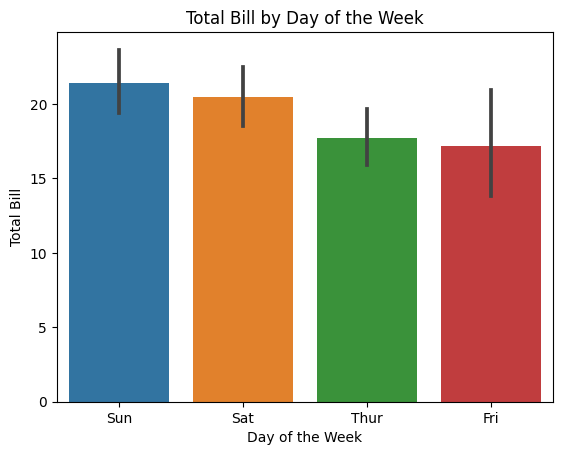

In [ ]:
# 분석 준비
# import seaborn as sns
sns.barplot(x='day', y='total_bill', data=tips)
plt.xlabel('Day of the Week')
plt.ylabel('Total Bill')
plt.title('Total Bill by Day of the Week')
plt.show()

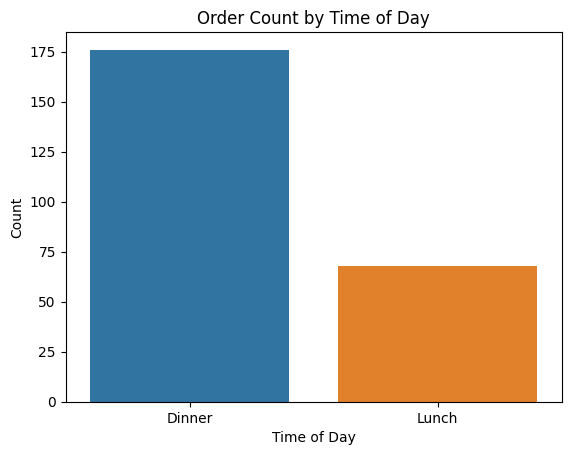

In [ ]:
# 시간대별 주문 패턴 시각화
sns.countplot(x='time', data=tips)
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.title('Order Count by Time of Day')
plt.show()

### Step 3. 범주형 변수 간의 상호작용을 탐색

<br> 🇶 **'total_bill'과 변수들 간의 상호작용에 문제가 없는가?**
<br> 🇦 이 모델은 전반적으로 종속 변수인 영수 금액 (total_bill)에 대한 설명력이 낮습니다.
<br> 🇦 P-value가 0.05보다 작은 독립 변수가 없으며, 모델의 독립 변수들은 종속 변수에 통계적으로 유의미한 영향을 미치지 않는 것으로 나타납니다.
<br> 🇦 R-squared 값이 낮으므로 종속 변수의 변동을 설명하기에는 부적절한 모델일 수 있습니다.
<br> 🇦 F-통계량은 유의미하게 나타납니다.



<br> 🇶 **'tip'과 변수들 간의 상호작용에 문제가 없는가?**
<br> 🇦 이 모델은 전반적으로 팁 (tip)에 대한 설명력이 낮습니다.
<br> 🇦 P-value가 0.05보다 큰 독립 변수들이 다수 존재하며, 모델의 독립 변수들은 종속 변수에 통계적으로 유의미한 영향을 미치지 않는 것으로 나타납니다.
<br> 🇦 R-squared 값이 낮으므로 종속 변수의 변동을 설명하기에는 부적절한 모델일 수 있습니다.
<br> 🇦 F-통계량이 작으므로 모델의 유의성이 낮다는 것을 나타냅니다.

In [ ]:
# 선형회귀모델로 'total_bill'과 변수들 간의 상호작용
# import statsmodels.api as sm

# 성별, 흡연 여부, 요일, 시간대를 독립 변수로 사용하여 주문 금액을 예측하는 모델
X = tips[['sex', 'smoker', 'day', 'time']]   # 독립변수 프레임 X 생성
X = pd.get_dummies(X, drop_first=True)       # 원핫 인코딩: 다중공선성 제거 (변수간의 높은 상관관계 제거)
X = sm.add_constant(X)                       # 상수항 추가: X에 상수 항 (절편)을 추가
y = tips['total_bill']

model = sm.OLS(y, X).fit()                   # sm: 선형 회귀 모델을 생성 // OLS(y, X): 종속 변수 y와 독립 변수 X로 정의 // fit(): 모델을 데이터에 피팅하는 메서드
print(model.summary())                       # 회귀 계수, 통계적 유의성, 결정 계수 (R-squared), F-통계량 등이 포함

                            OLS Regression Results                            
Dep. Variable:             total_bill   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     2.789
Date:                Fri, 27 Oct 2023   Prob (F-statistic):             0.0122
Time:                        05:29:32   Log-Likelihood:                -870.86
No. Observations:                 244   AIC:                             1756.
Df Residuals:                     237   BIC:                             1780.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.6452      2.665      6.245      0.0

In [ ]:
# 선형회귀모델로 'tip'과 변수들 간의 상호작용
# import statsmodels.api as sm

# 성별, 흡연 여부, 요일, 시간대를 독립 변수로 사용하여 주문 금액을 예측하는 모델
X = tips[['sex', 'smoker', 'day', 'time']]
X = pd.get_dummies(X, drop_first=True)
X = sm.add_constant(X)
y = tips['tip']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.117
Date:                Fri, 27 Oct 2023   Prob (F-statistic):              0.353
Time:                        07:27:04   Log-Likelihood:                -421.55
No. Observations:                 244   AIC:                             857.1
Df Residuals:                     237   BIC:                             881.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7640      0.423      6.539      0.0

---
*판다스에서 제공하는 데이터셋과 데이터리안에서 제공하는 문제풀이를 활용하였습니다.*
<br>
`#데이터리안` `#판다스공부` `#TIL`